In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../..')
import omama as O
import sklearn

Populating the interactive namespace from numpy and matplotlib


In [2]:
odl = O.OutlierDetectorLite()

In [3]:
data_imgs = odl.load_data(DATASET='C')

In [4]:
gt = odl.load_ground_truth('C')

In [5]:
len(data_imgs)

100

In [6]:
binary_bin_feats = O.Features.get_features(data=data_imgs, feature_type='hist', norm_type='minmax', bins=5)

In [7]:
bad_images = []
bad_indexes_found = []
paths = []
for i, binary in enumerate(binary_bin_feats):
    if binary[4] > 15000 or binary[1] < 2000:
        print(i, binary)
        bad_images.append(data_imgs[i])
        paths.append(data_imgs[i].filePath)
        bad_indexes_found.append(i)

5 [2260384  212149 1459677  292217  166289]
9 [2654204   33784 1130129  411054  161545]
10 [2498523  135654 1217897  438012  100630]
14 [2930052  191456  876302  198389  194517]
18 [3059749  197464  788338  176756  168409]
21 [2400224  179532 1341227  295160  174573]
22 [2646339  111429 1118259  312938  201751]
24 [2647021   19223  683399  883726  157347]
25 [3145224  166334  496120  321640  261398]
36 [2562034  227491 1169117  333755   98319]
38 [2362073  188710 1404113  283727  152093]
46 [2918948  205467  844197  265226  156878]
57 [2983081  183734  699987  389655  134259]
58 [2089187 1130134  594192  335013  242190]
71 [2048013   85514 1634911  544130   78148]
73 [2837801   15013  223174 1208486  106242]
77 [2628950  150649 1188062  227036  196019]
86 [2184000  207194 1566179  326491  106852]
87 [2807526  139678  929925  320374  193213]
91 [2977350  921716   65750  297245  128655]
98 [2646659  111285 1119155  398736  114881]


In [8]:
np.where(np.array(gt)>0)

(array([ 1,  5,  9, 10, 14, 18, 21, 22, 24, 25, 36, 38, 44, 46, 57, 58, 69,
        71, 73, 77, 86, 87, 91, 98]),)

In [9]:
len(bad_images)

21

In [11]:
preds = O.DataHelper.build_gt(100, bad_indexes_found)

In [12]:
f1 = sklearn.metrics.f1_score(gt, preds)

In [13]:
f1

0.9333333333333333

In [10]:
bad_images2 = []
for item in np.where(np.array(gt)>0):
    for index in item:
        bad_images2.append(data_imgs[index])

Loading config data from ini file
DataLoader type is:  <class 'omama.loaders.omama_loader.OmamaLoader'>


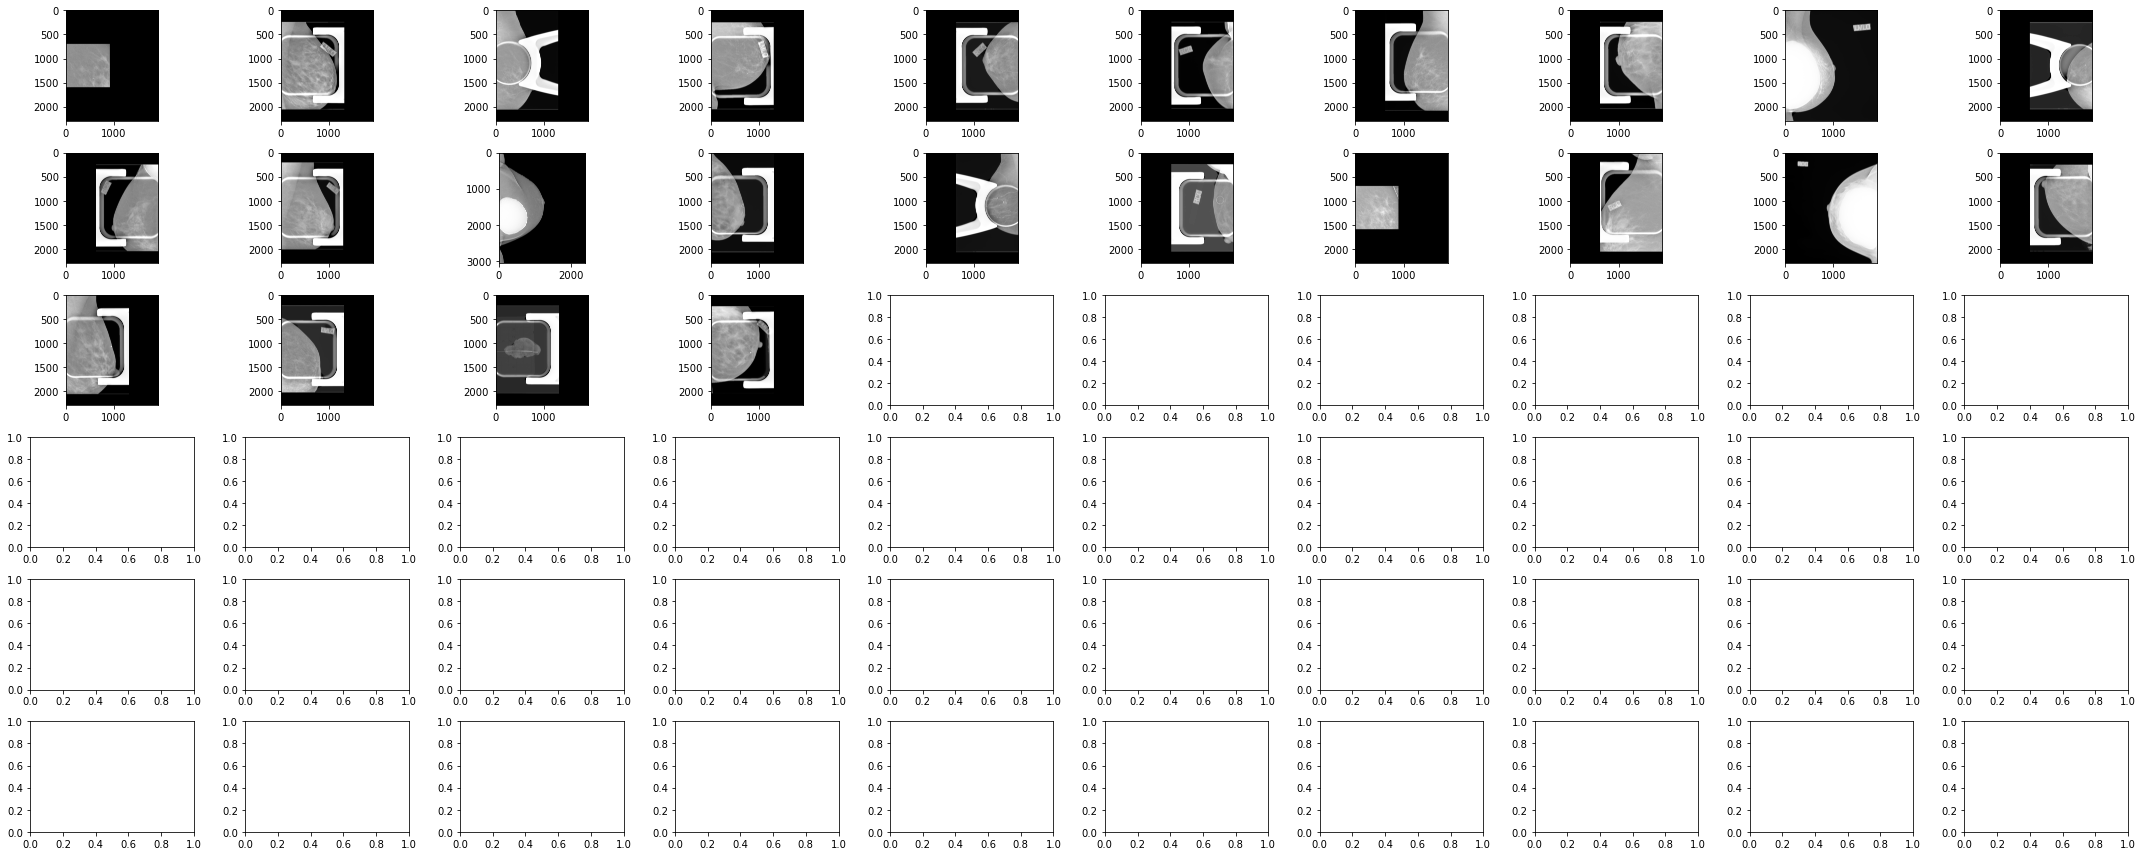

In [11]:
O.DataHelper.view_grid(bad_images2, ncols=10)